In [1]:
!pip install geopandas
!pip install descartes

     |████████████████████████████████| 962kB 3.1MB/s eta 0:00:01     |██████████████████████████▋     | 798kB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 8.2MB/s eta 0:00:01    |███████████████████▉            | 6.8MB 1.3MB/s eta 0:00:04     |████████████████████████        | 8.2MB 1.3MB/s eta 0:00:03
     |████████████████████████████████| 14.7MB 10.5MB/s eta 0:00:01   |██▋                             | 1.2MB 8.5MB/s eta 0:00:02     |████████████████▌               | 7.6MB 8.5MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 10.8MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%matplotlib inline

In [3]:
covid= pd.read_excel('covid19_zip.xlsx')

In [5]:
covid.columns

Index(['Zip_Code', 'NEIGHBORHOOD_NAME', 'BOROUGH_GROUP', 'COVID_CASE_RATE',
       'POP_DENOMINATOR', 'COVID_DEATH_RATE', 'PERCENT_POSITIVE', 'geoid',
       'Population', 'Log_Median_Income', 'E_POV_rate', 'E_UNEMP_rate',
       'E_NOHSDP_rate', 'E_AGE65_rate', 'E_DISABL_rate', 'E_SNGPNT_rate',
       'E_MINRTY_rate', 'E_LIMENG_rate', 'E_MUNIT_rate', 'E_MOBILE_rate',
       'E_CROWD_rate', 'E_NOVEH_rate', 'E_GROUPQ_rate', 'COPD_rate',
       'Coronary Heart Disease_rate', 'Diabetes_rate',
       'High Blood Pressure_rate', 'Obesity_rate',
       'Chronic Kidney Disease_rate'],
      dtype='object')

# Correlation

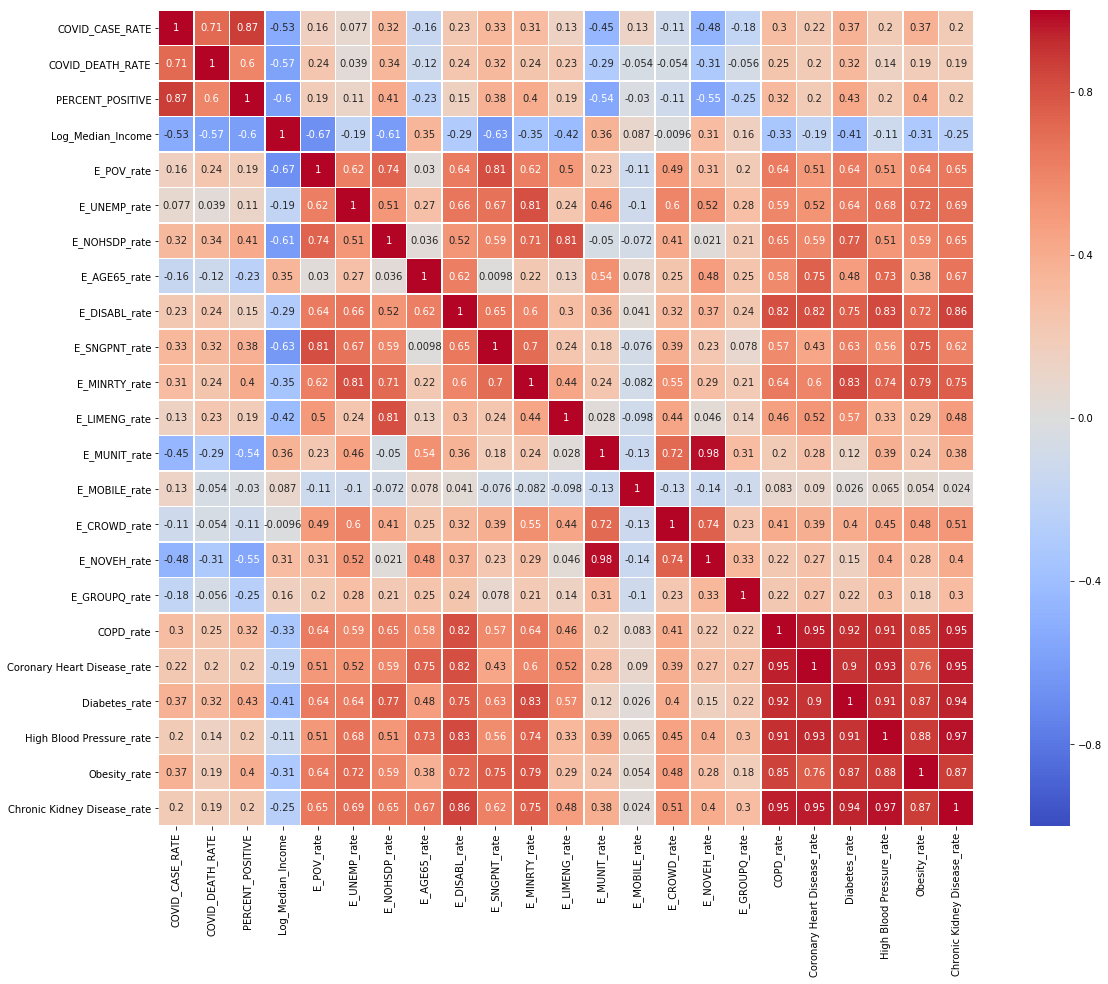

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(20,15))
covid_corr = covid.drop(['Zip_Code', 'NEIGHBORHOOD_NAME', 'BOROUGH_GROUP', 'POP_DENOMINATOR','geoid',
       'Population'], axis=1)
corrMatrix = covid_corr.corr()
sns.heatmap(corrMatrix, annot=True, linewidth = 0.5, cmap='coolwarm',square=True, vmin = -1, vmax = 1)
plt.show()
plt.tight_layout()

# Map

In [12]:
fp = "acs2018_5yr_B19001_86000US10543.shp"
map_df = gpd.read_file(fp)
# check the GeoDataframe
map_df.head()

,geoid,name,B19001001,B19001001e,B19001002,B19001002e,B19001003,B19001003e,B19001004,B19001004e,...,B19001013e,B19001014,B19001014e,B19001015,B19001015e,B19001016,B19001016e,B19001017,B19001017e,geometry
0,01000US,United States,119730128.0,232429.0,7584305.0,18464.0,5507051.0,15243.0,5488289.0,17043.0,...,47276.0,10600942.0,51888.0,6932183.0,35577.0,7513313.0,42617.0,8355566.0,47620.0,"(POLYGON ((-168.225273 -14.535906, -168.199527..."
1,04000US36,New York,7316537.0,13711.0,492408.0,5214.0,378399.0,3977.0,325767.0,4093.0,...,7268.0,658357.0,5530.0,466265.0,5399.0,554471.0,5334.0,712800.0,7070.0,"(POLYGON ((-79.312136 42.686805, -79.249765999..."
2,86000US06390,06390,73.0,45.0,0.0,12.0,2.0,3.0,0.0,12.0,...,12.0,6.0,6.0,0.0,12.0,21.0,30.0,7.0,7.0,"(POLYGON ((-72.00941899999999 41.285283, -72.0..."
3,86000US07421,07421,2637.0,164.0,50.0,53.0,35.0,32.0,32.0,37.0,...,112.0,315.0,112.0,263.0,103.0,391.0,121.0,226.0,87.0,"(POLYGON ((-74.331046 41.186667, -74.331017 41..."
4,86000US10001,10001,12431.0,521.0,1096.0,324.0,488.0,168.0,494.0,175.0,...,235.0,1063.0,266.0,873.0,210.0,945.0,197.0,2797.0,350.0,"POLYGON ((-74.00828 40.750272, -74.007829 40.7..."


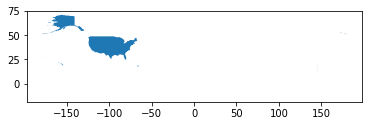

In [13]:
map_df.plot()

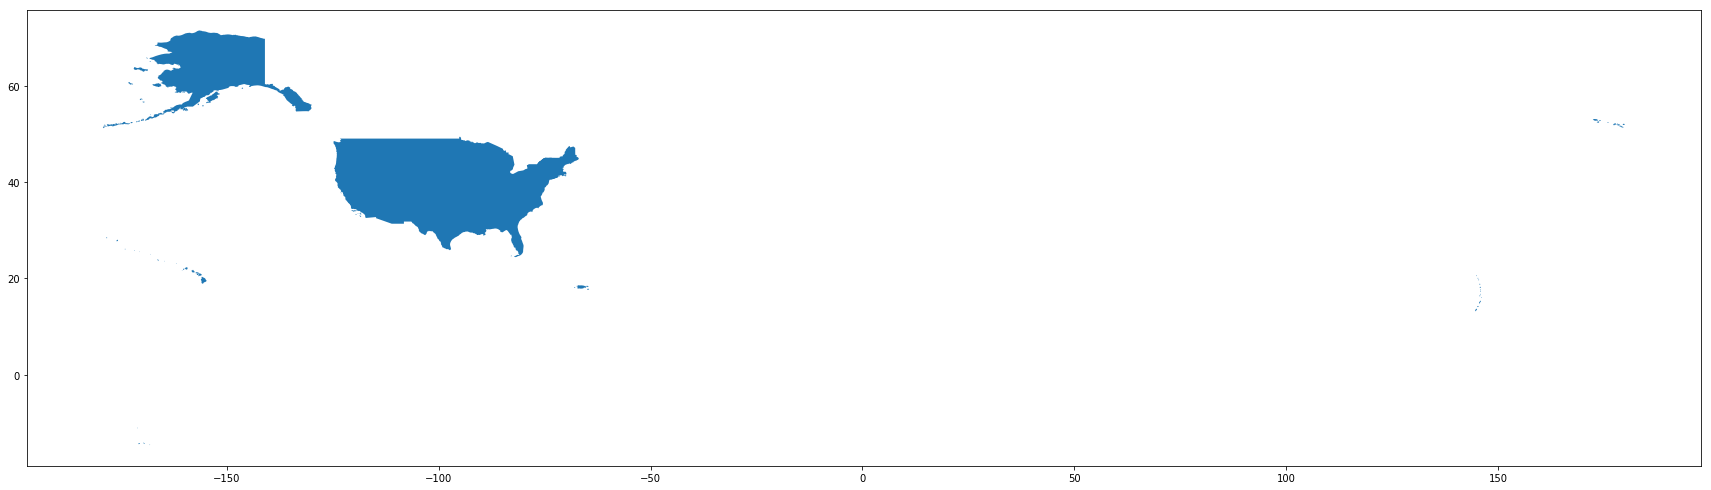

In [14]:
plt.rcParams['figure.figsize'] = [30, 90] #height, width
map_df.plot()

In [15]:
# join the geodataframe with the csv dataframe
merged = map_df.merge(covid, how='left', on="geoid")

merged.head()

,geoid,name,B19001001,B19001001e,B19001002,B19001002e,B19001003,B19001003e,B19001004,B19001004e,...,E_MOBILE_rate,E_CROWD_rate,E_NOVEH_rate,E_GROUPQ_rate,COPD_rate,Coronary Heart Disease_rate,Diabetes_rate,High Blood Pressure_rate,Obesity_rate,Chronic Kidney Disease_rate
0,01000US,United States,119730128.0,232429.0,7584305.0,18464.0,5507051.0,15243.0,5488289.0,17043.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04000US36,New York,7316537.0,13711.0,492408.0,5214.0,378399.0,3977.0,325767.0,4093.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,86000US06390,06390,73.0,45.0,0.0,12.0,2.0,3.0,0.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86000US07421,07421,2637.0,164.0,50.0,53.0,35.0,32.0,32.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,86000US10001,10001,12431.0,521.0,1096.0,324.0,488.0,168.0,494.0,175.0,...,390.856744,13118.129471,305503.402548,23439.190368,725.750742,774.298988,1252.137062,4149.907521,3106.1922,431.894521


In [17]:
covid.describe()

,Zip_Code,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_RATE,PERCENT_POSITIVE,Population,Log_Median_Income,E_POV_rate,E_UNEMP_rate,E_NOHSDP_rate,...,E_MOBILE_rate,E_CROWD_rate,E_NOVEH_rate,E_GROUPQ_rate,COPD_rate,Coronary Heart Disease_rate,Diabetes_rate,High Blood Pressure_rate,Obesity_rate,Chronic Kidney Disease_rate
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,...,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,10810.378531,2338.201073,47425.734237,193.888079,19.102655,47645.062147,11.099865,69396.146579,14765.885229,48380.276484,...,255.239395,13718.430854,97588.995571,10018.528743,787.359610,776.305985,1527.819608,4067.548953,3497.292348,434.312640
std,578.173317,890.505867,26411.133886,105.136590,5.937915,26698.398778,0.464267,40803.708347,6934.726770,27337.127887,...,410.541113,10619.531932,105053.129958,13897.950827,269.111438,276.822385,571.269023,1449.633885,1255.200798,154.012705
min,10001.000000,582.200000,3457.770000,0.000000,7.150000,3028.000000,9.959348,8700.564972,4580.331061,1297.046902,...,0.000000,1977.401130,8511.029412,0.000000,168.578460,129.675738,259.351477,1193.016792,1400.497973,115.843504
25%,10301.000000,1654.400000,26614.420000,121.560000,15.140000,27403.000000,10.836281,40774.634517,10119.679797,29010.660183,...,63.171805,7645.786260,40363.668882,2200.887788,627.498415,640.366676,1183.466859,3298.352484,2649.125093,353.880850
50%,11109.000000,2411.110000,43030.430000,182.630000,20.150000,42653.000000,11.104702,60110.929853,13138.871275,43816.202251,...,184.160820,11480.910803,73698.638884,5781.960619,753.325239,743.746496,1498.267991,3821.449508,3373.428201,417.400347
75%,11361.000000,2962.490000,67089.290000,242.660000,24.080000,67094.000000,11.370693,93823.895536,17588.766085,64924.977167,...,306.941818,17186.210620,118268.105023,12198.408203,913.769599,869.740316,1810.191546,4577.093860,4003.672232,492.529447
max,11697.000000,4489.580000,111594.100000,660.580000,29.010000,112425.000000,12.429220,209117.612279,50673.712021,149628.363947,...,4192.090395,112906.208719,950871.862616,131408.230101,2066.574238,2399.252704,3774.965115,12654.648968,8241.769899,1335.970501


In [29]:
covid.columns

Index(['Zip_Code', 'NEIGHBORHOOD_NAME', 'BOROUGH_GROUP', 'COVID_CASE_RATE',
       'POP_DENOMINATOR', 'COVID_DEATH_RATE', 'PERCENT_POSITIVE', 'geoid',
       'Population', 'Log_Median_Income', 'E_POV_rate', 'E_UNEMP_rate',
       'E_NOHSDP_rate', 'E_AGE65_rate', 'E_DISABL_rate', 'E_SNGPNT_rate',
       'E_MINRTY_rate', 'E_LIMENG_rate', 'E_MUNIT_rate', 'E_MOBILE_rate',
       'E_CROWD_rate', 'E_NOVEH_rate', 'E_GROUPQ_rate', 'COPD_rate',
       'Coronary Heart Disease_rate', 'Diabetes_rate',
       'High Blood Pressure_rate', 'Obesity_rate',
       'Chronic Kidney Disease_rate'],
      dtype='object')

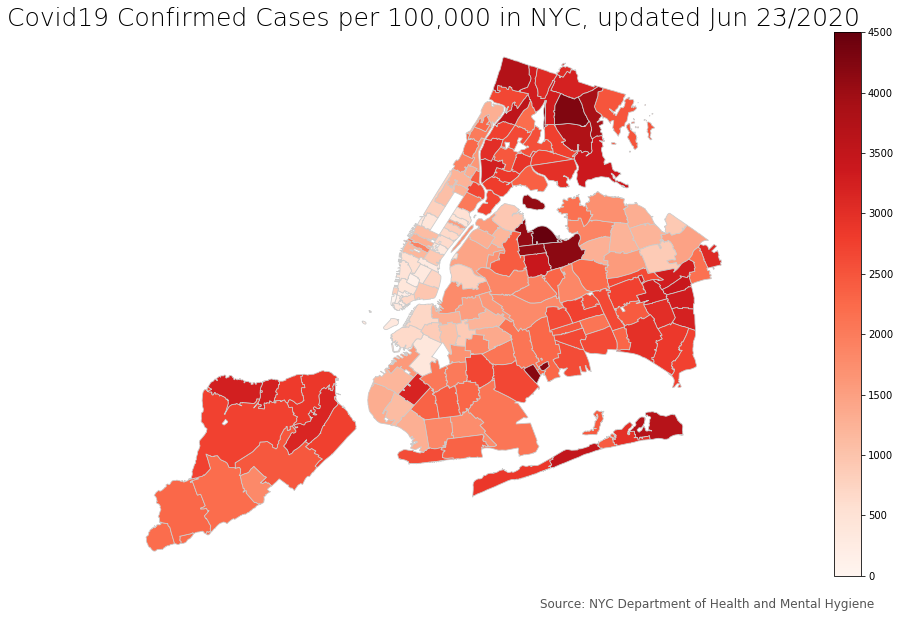

In [18]:
# set the value column that will be visualised
variable = 'COVID_CASE_RATE'
# set the range for the choropleth values
vmin, vmax = 0, 4500
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Covid19 Confirmed Cases per 100,000 in NYC, updated Jun 23/2020', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: NYC Department of Health and Mental Hygiene', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

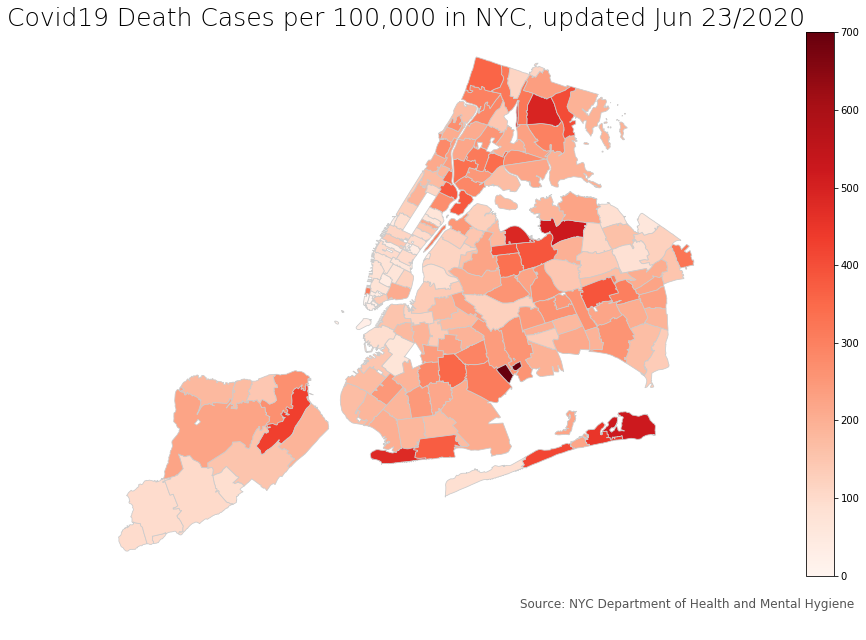

In [28]:
# set the value column that will be visualised
variable = 'COVID_DEATH_RATE'
# set the range for the choropleth values
vmin, vmax = 0, 700
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Covid19 Death Cases per 100,000 in NYC, updated Jun 23/2020', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: NYC Department of Health and Mental Hygiene', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

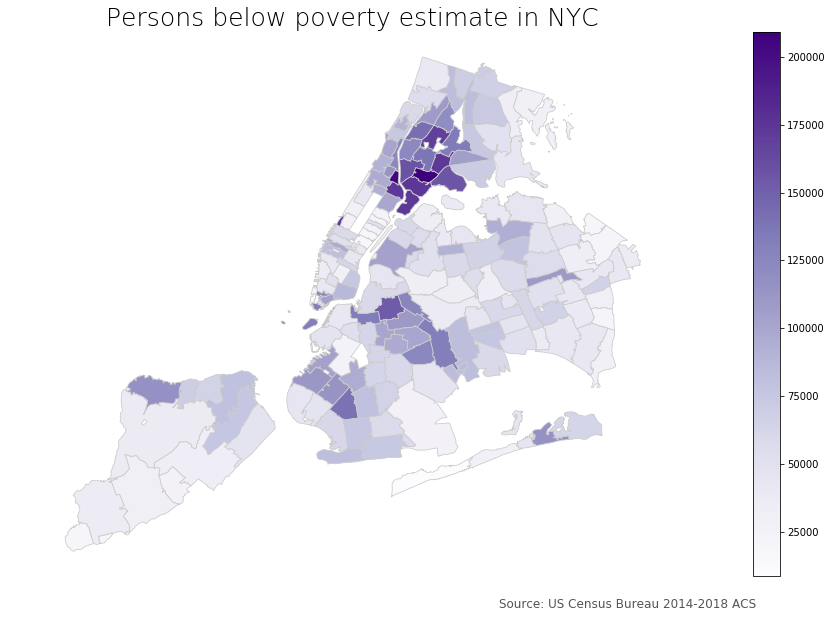

In [30]:
# set the value column that will be visualised
variable = 'E_POV_rate'
# set the range for the choropleth values
vmin, vmax = 8700, 209117
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Persons below poverty estimate in NYC', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: US Census Bureau 2014-2018 ACS', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8')

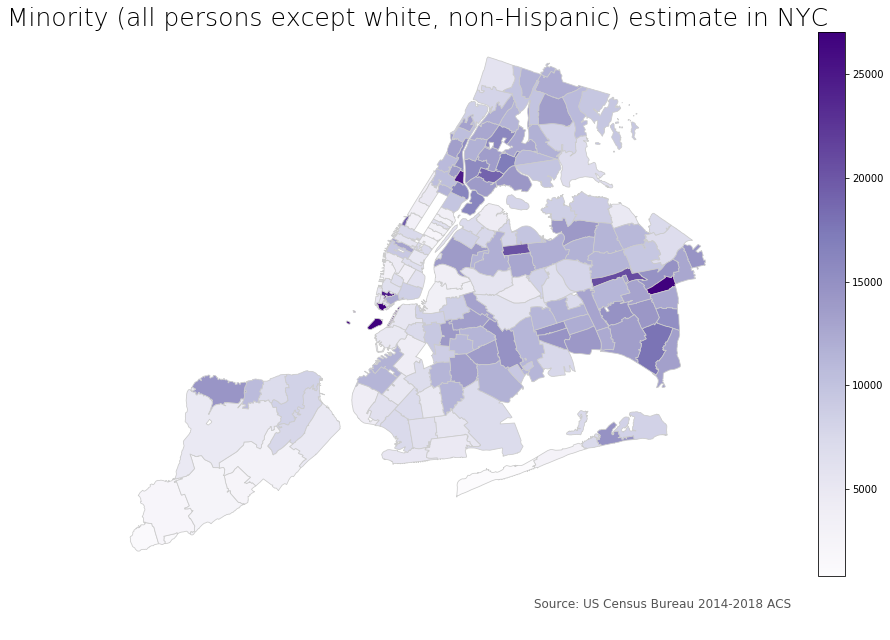

In [31]:
# set the value column that will be visualised
variable = 'E_MINRTY_rate'
# set the range for the choropleth values
vmin, vmax = 838, 27000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Minority (all persons except white, non-Hispanic) estimate in NYC', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: US Census Bureau 2014-2018 ACS', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8')

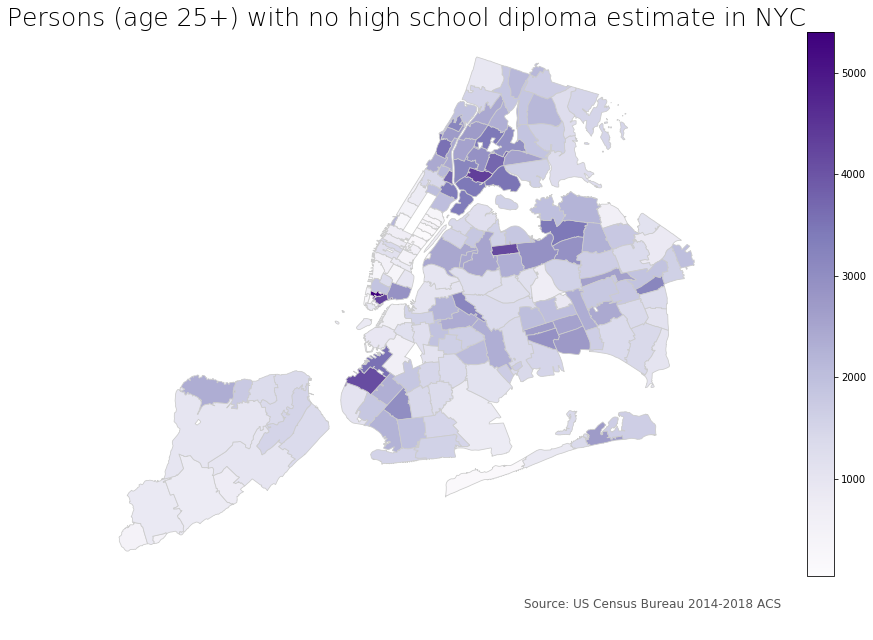

In [32]:
# set the value column that will be visualised
variable = 'E_NOHSDP_rate'
# set the range for the choropleth values
vmin, vmax = 46, 5400
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Persons (age 25+) with no high school diploma estimate in NYC', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: US Census Bureau 2014-2018 ACS', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8')

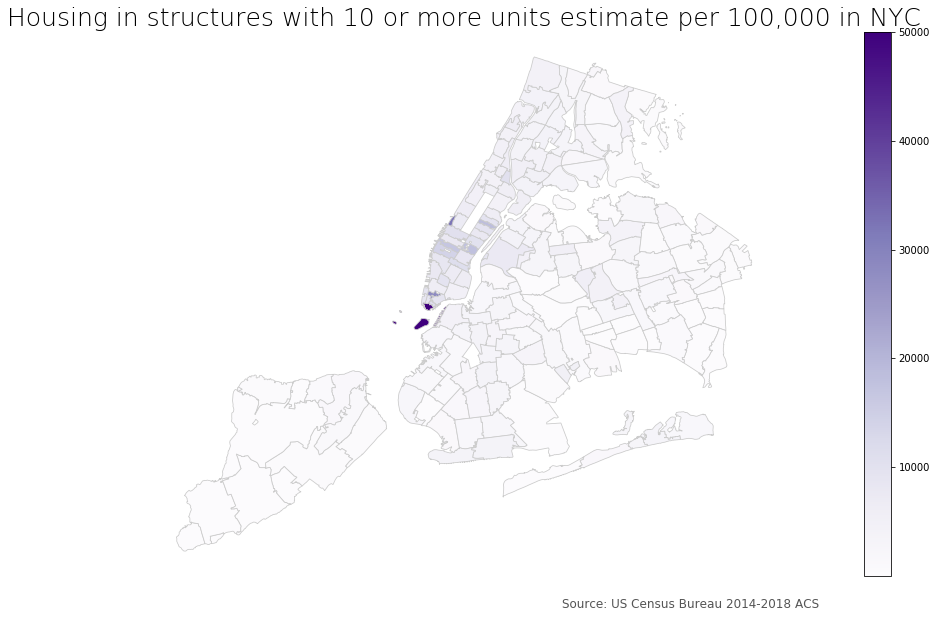

In [33]:
# set the value column that will be visualised
variable = 'E_MUNIT_rate'
# set the range for the choropleth values
vmin, vmax = 17, 50000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Housing in structures with 10 or more units estimate per 100,000 in NYC', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: US Census Bureau 2014-2018 ACS', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8')

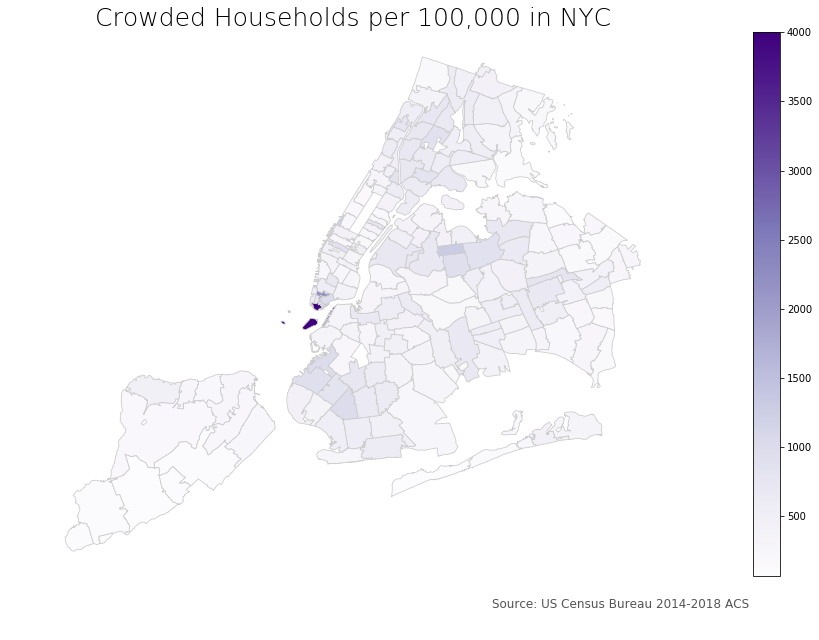

In [35]:
# set the value column that will be visualised
variable = 'E_CROWD_rate'
# set the range for the choropleth values
vmin, vmax = 70, 4000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Crowded Households per 100,000 in NYC', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: US Census Bureau 2014-2018 ACS', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8')